Analyses properties of decorrelation and whitening methods for FC and Convolutional cases.

In [1]:
import numpy as np
import torch
from decorrelation.decorrelation import lower_triangular, Decorrelation, DecorConv2d # DecorrelationPatch2d # covariance, DecorrelationPatch2d, DecorrelationFC, lower_triangular
from decorrelation.plotting import *
from decorrelation.utils import generate_correlated_data

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
def train(num_epochs, data, model):

    # covariance matrix before training
    with torch.no_grad():
        X = model.decorrelate(data).reshape(data.shape[0],-1)
        A1 = (X.T @ X) / len(X)

    # train decorrelator
    L = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        model.forward(data)
        L[epoch] = model.update()
        print(f'epoch {epoch:<3}\tloss: {L[epoch]:3f}')

    # covariance matrix after training
    with torch.no_grad():
        X = model.decorrelate(data).reshape(data.shape[0],-1)
        A2 = (X.T @ X) / len(X)

    return L, A1, A2

Standard method (original learning rule with whitening case)

epoch 0  	loss: 0.047660
epoch 1  	loss: 0.000437
epoch 2  	loss: 0.000579
epoch 3  	loss: 0.000617
epoch 4  	loss: 0.000586
epoch 5  	loss: 0.000557
epoch 6  	loss: 0.000533
epoch 7  	loss: 0.000512
epoch 8  	loss: 0.000494
epoch 9  	loss: 0.000478
epoch 10 	loss: 0.000464
epoch 11 	loss: 0.000451
epoch 12 	loss: 0.000439
epoch 13 	loss: 0.000428
epoch 14 	loss: 0.000417
epoch 15 	loss: 0.000408
epoch 16 	loss: 0.000399
epoch 17 	loss: 0.000390
epoch 18 	loss: 0.000382
epoch 19 	loss: 0.000374
epoch 20 	loss: 0.000366
epoch 21 	loss: 0.000359
epoch 22 	loss: 0.000352
epoch 23 	loss: 0.000345
epoch 24 	loss: 0.000339
epoch 25 	loss: 0.000333
epoch 26 	loss: 0.000327
epoch 27 	loss: 0.000321
epoch 28 	loss: 0.000315
epoch 29 	loss: 0.000309
epoch 30 	loss: 0.000304
epoch 31 	loss: 0.000299
epoch 32 	loss: 0.000294
epoch 33 	loss: 0.000289
epoch 34 	loss: 0.000284
epoch 35 	loss: 0.000279
epoch 36 	loss: 0.000274
epoch 37 	loss: 0.000270
epoch 38 	loss: 0.000265
epoch 39 	loss: 0.000261


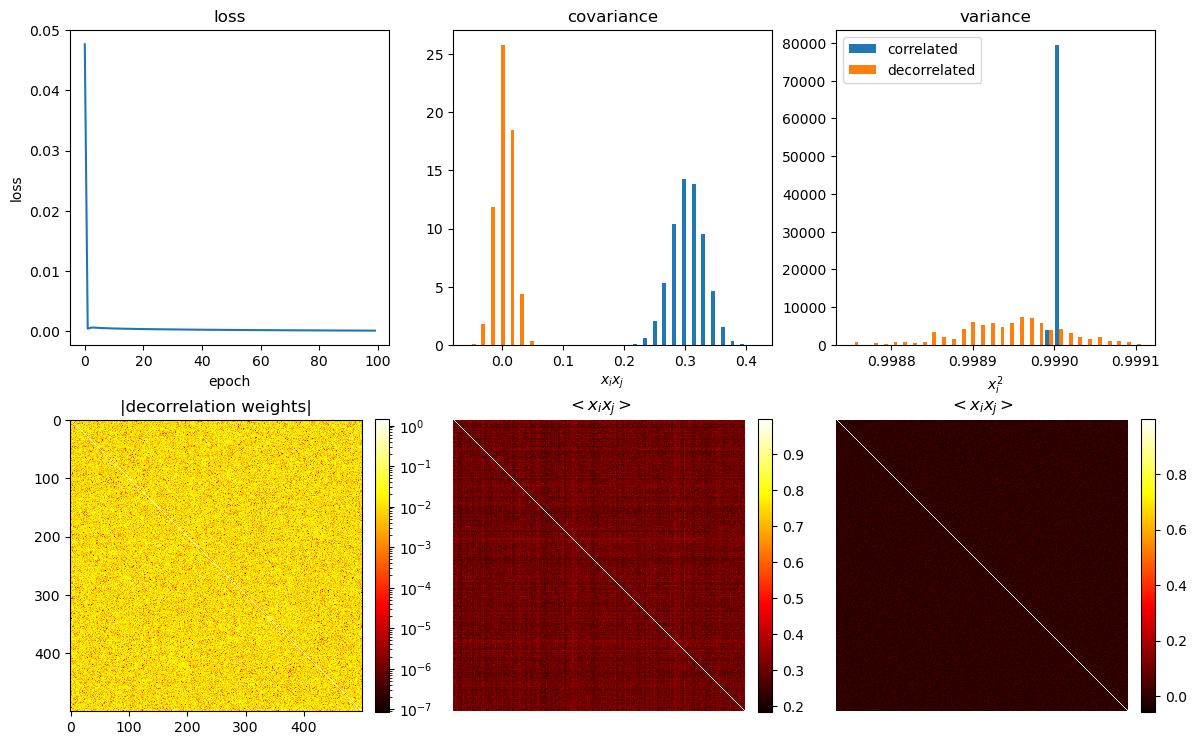

In [3]:
num_samples=1000
num_features=500
num_epochs=100
seed=42
decor_lr=1e-2
kappa=0.5
method='standard'

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
data = generate_correlated_data(num_features, num_samples).to(device)

# create a decorrelator
model = Decorrelation(in_features=num_features, method=method, decor_lr=decor_lr, kappa=kappa).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')


Normalized approach

epoch 0  	loss: 0.085959
epoch 1  	loss: 0.025799
epoch 2  	loss: 0.016671
epoch 3  	loss: 0.011910
epoch 4  	loss: 0.008920
epoch 5  	loss: 0.006913
epoch 6  	loss: 0.005521
epoch 7  	loss: 0.004531
epoch 8  	loss: 0.003808
epoch 9  	loss: 0.003269
epoch 10 	loss: 0.002857
epoch 11 	loss: 0.002537
epoch 12 	loss: 0.002283
epoch 13 	loss: 0.002078
epoch 14 	loss: 0.001911
epoch 15 	loss: 0.001772
epoch 16 	loss: 0.001656
epoch 17 	loss: 0.001558
epoch 18 	loss: 0.001473
epoch 19 	loss: 0.001401
epoch 20 	loss: 0.001338
epoch 21 	loss: 0.001282
epoch 22 	loss: 0.001233
epoch 23 	loss: 0.001190
epoch 24 	loss: 0.001151
epoch 25 	loss: 0.001116
epoch 26 	loss: 0.001084
epoch 27 	loss: 0.001055
epoch 28 	loss: 0.001029
epoch 29 	loss: 0.001005
epoch 30 	loss: 0.000983
epoch 31 	loss: 0.000962
epoch 32 	loss: 0.000943
epoch 33 	loss: 0.000925
epoch 34 	loss: 0.000909
epoch 35 	loss: 0.000893
epoch 36 	loss: 0.000879
epoch 37 	loss: 0.000865
epoch 38 	loss: 0.000852
epoch 39 	loss: 0.000840


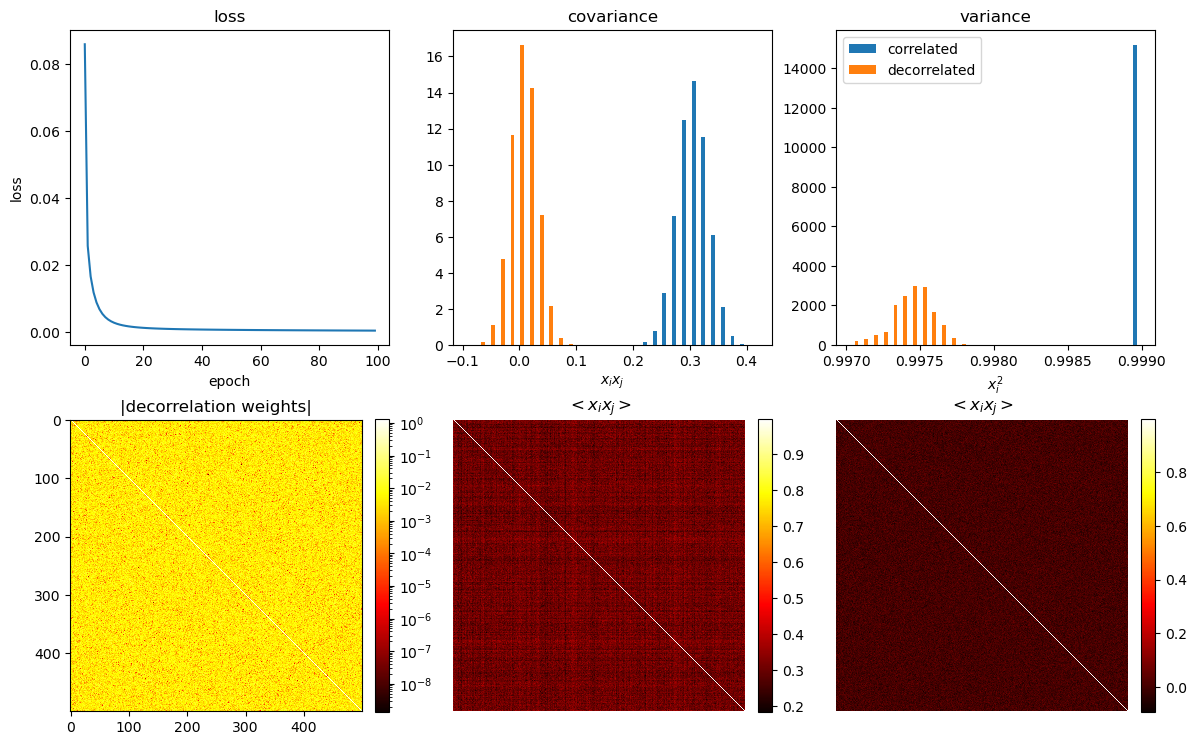

In [4]:
num_samples=1000
num_features=500
num_epochs=100
seed=42
decor_lr=1e-0
kappa=1e-1
method='normalized'

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# generate correlated data
data = generate_correlated_data(num_features, num_samples).to(device)

# create a decorrelator
model = Decorrelation(in_features=num_features, method=method, decor_lr=decor_lr, kappa=kappa).to(device)

L, A1, A2 = train(num_epochs, data, model)

plot_decorrelation_results(model, L, A1, A2)
print(f'mean variance: {torch.mean(torch.diag(A2)):.2f}')